In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
# Fetch the dataset with the specific data_id for 'house_prices' on 

In [66]:
data = fetch_openml(data_id=43926, as_frame=True )
data

{'data':                               MS_SubClass                 MS_Zoning  \
 0     One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
 1     One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
 2     One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
 3     One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
 4                Two_Story_1946_and_Newer   Residential_Low_Density   
 ...                                   ...                       ...   
 2925                  Split_or_Multilevel   Residential_Low_Density   
 2926  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
 2927                          Split_Foyer   Residential_Low_Density   
 2928  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
 2929             Two_Story_1946_and_Newer   Residential_Low_Density   
 
       Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
 0              141     31770   Pave  No_Alley_Ac

In [67]:
df = data.frame

print(f"\nDataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()[:10]}...")  # Show first 10 columns

# Display basic info
print("\nDataFrame info:")
print(df.info())

# Show first few rows
print("\nFirst 5 rows:")
print(df.head())


DataFrame shape: (2930, 81)
Columns: ['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config']...

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MS_SubClass         2930 non-null   category
 1   MS_Zoning           2930 non-null   category
 2   Lot_Frontage        2930 non-null   int64   
 3   Lot_Area            2930 non-null   int64   
 4   Street              2930 non-null   category
 5   Alley               2930 non-null   category
 6   Lot_Shape           2930 non-null   category
 7   Land_Contour        2930 non-null   category
 8   Utilities           2930 non-null   category
 9   Lot_Config          2930 non-null   category
 10  Land_Slope          2930 non-null   category
 11  Neighborhood        2930 non-null   category
 12

Input features X: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MS_SubClass         2930 non-null   category
 1   MS_Zoning           2930 non-null   category
 2   Lot_Frontage        2930 non-null   int64   
 3   Lot_Area            2930 non-null   int64   
 4   Street              2930 non-null   category
 5   Alley               2930 non-null   category
 6   Lot_Shape           2930 non-null   category
 7   Land_Contour        2930 non-null   category
 8   Utilities           2930 non-null   category
 9   Lot_Config          2930 non-null   category
 10  Land_Slope          2930 non-null   category
 11  Neighborhood        2930 non-null   category
 12  Condition_1         2930 non-null   category
 13  Condition_2         2930 non-null   category
 14  Bldg_Type           2930 non-null   category
 15  House_Style       

<Axes: ylabel='Sale_Price'>

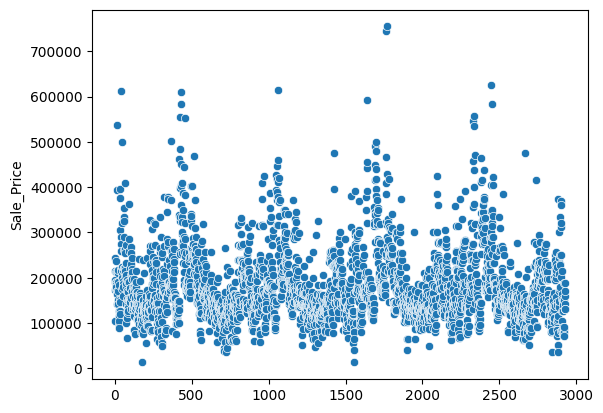

In [68]:
X = data.data
y = data.target

print("Input features X: \n")
print(X.info()) # all the features/input data

print("Target output y: \n")
print(y.info()) # sale price

sns.scatterplot(y)

In [69]:
data.frame.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [70]:
# Preprocessing the data, and then applying feature scaling to normalize the features and finallly applying multiple linear regression to predict the price of a new house.

# Step 1: Data cleaning/preprocessing

# For now, we will only keep numerical values 


#### Step 1: Identifying categorical columns

In [71]:
# Get a Series of column names and their dtypes
dtypes_series = X.dtypes

# Filter for columns where the dtype is 'category'.
categorical_columns = [col for col, dtype in dtypes_series.items() if str(dtype) in ['category']]

print(categorical_columns)
print(len(categorical_columns))


['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature', 'Sale_Type', 'Sale_Condition']
46


#### Step 2: Inspect cardinality (VERY important)

For each categorical column:

* How many unique values?

You’ll discover:

* Some have 3–5 categories (easy)

* Some have 30+ categories (danger zone)

👉 These will matter for feature selection later.

#### Why are we inspecting cardinality? 


* So that we can convert the categorical data into numerical data 
using concepts like One Hot encoding 

How It Works:

For a categorical feature with N distinct categories, one-hot encoding creates N new binary features:

Example: "Color" feature with values: [Red, Blue, Green]

Original:

| Color  |
|--------|
| Red    |
| Blue   |
| Green  |
| Red    |

After one-hot encoding:

| Color_Red | Color_Blue | Color_Green |
|-----------|------------|-------------|
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |
| 1         | 0          | 0           |

---
> And hence we want to remove features with more than 20 unique categories as that would result in addition of 20 new columns for that feature

In [72]:
unique_categories = {}
for i in categorical_columns:
    unique_count = len(np.unique(X[i]))
    unique_categories[i]  = unique_count
print(unique_categories)

{'MS_SubClass': 16, 'MS_Zoning': 7, 'Street': 2, 'Alley': 3, 'Lot_Shape': 4, 'Land_Contour': 4, 'Utilities': 3, 'Lot_Config': 5, 'Land_Slope': 3, 'Neighborhood': 28, 'Condition_1': 9, 'Condition_2': 8, 'Bldg_Type': 5, 'House_Style': 8, 'Overall_Qual': 10, 'Overall_Cond': 9, 'Roof_Style': 6, 'Roof_Matl': 8, 'Exterior_1st': 16, 'Exterior_2nd': 17, 'Mas_Vnr_Type': 5, 'Exter_Qual': 4, 'Exter_Cond': 5, 'Foundation': 6, 'Bsmt_Qual': 6, 'Bsmt_Cond': 6, 'Bsmt_Exposure': 5, 'BsmtFin_Type_1': 7, 'BsmtFin_Type_2': 7, 'Heating': 6, 'Heating_QC': 5, 'Central_Air': 2, 'Electrical': 6, 'Kitchen_Qual': 5, 'Functional': 8, 'Fireplace_Qu': 6, 'Garage_Type': 7, 'Garage_Finish': 4, 'Garage_Qual': 6, 'Garage_Cond': 6, 'Paved_Drive': 3, 'Pool_QC': 5, 'Fence': 5, 'Misc_Feature': 6, 'Sale_Type': 10, 'Sale_Condition': 6}


#### Sanity checks

Before doing anything fancy, mentally flag:

🚮 Drop immediately

* unique_count == 1

    * Zero variance

    * Absolutely useless

🚨 Danger zone

* unique_count > ~20

    * High-cardinality categorical

    * Do NOT one-hot encode blindly

😎 Safe to encode

* unique_count > 1 & < 20

    * We will encode this

In [73]:
# since we dont have any column with just one unique category, we will ignore that condition, if there was any, we would just drop that column
low_category_count = []
mid_category_count = []
high_category_count = []
for key, value in unique_categories.items():
    if value < 6:
        low_category_count.append(key)
    elif value < 15:
        mid_category_count.append(key)
    else:
        high_category_count.append(key)
print(low_category_count)
print(mid_category_count)
print(high_category_count)

['Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Bldg_Type', 'Mas_Vnr_Type', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Exposure', 'Heating_QC', 'Central_Air', 'Kitchen_Qual', 'Garage_Finish', 'Paved_Drive', 'Pool_QC', 'Fence']
['MS_Zoning', 'Condition_1', 'Condition_2', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Electrical', 'Functional', 'Fireplace_Qu', 'Garage_Type', 'Garage_Qual', 'Garage_Cond', 'Misc_Feature', 'Sale_Type', 'Sale_Condition']
['MS_SubClass', 'Neighborhood', 'Exterior_1st', 'Exterior_2nd']


In [74]:
# plotting high categories count 
# high_cat_count_data = X[high_category_count]
# print(high_cat_count_data)

# col = X[high_category_count[0]]
# value_counts = col.value_counts()
# top_5 = value_counts.head()
# sum_of_t5 = np.sum(top_5.values)
# print(sum_of_t5)
# total = np.sum(value_counts)
# contri_of_t5_in_total = (sum_of_t5/total) * 100
# print(contri_of_t5_in_total)

# As we can see that top 5 is contributing to more than 70% of the data, this is a good news for us, we will one hot encode top 5, and keep rest as others

# Now we will have to do this with all the columns in high cat count list.
col_to_ohe_high_cardinality = []
col_to_drop = []
for i in high_category_count:
    col = X[i]
    top_5 = col.value_counts().head()
    sum_of_t5 = np.sum(top_5.values)
    contri_of_t5 = (sum_of_t5/np.sum(col.value_counts())) * 100
    if contri_of_t5 > 70:
        col_to_ohe_high_cardinality.append(i)
    else:
        col_to_drop.append(i)
        print(f"Adding column {i} in drop list cuz its contri is {contri_of_t5}")

print(col_to_ohe_high_cardinality)
print(col_to_drop)


Adding column Neighborhood in drop list cuz its contri is 45.22184300341297
['MS_SubClass', 'Exterior_1st', 'Exterior_2nd']
['Neighborhood']


In [75]:
for i in high_category_count:
    col = X[i]
    top_5 = col.value_counts().head()
    print(top_5.index)

CategoricalIndex(['One_Story_1946_and_Newer_All_Styles',
                  'Two_Story_1946_and_Newer',
                  'One_and_Half_Story_Finished_All_Ages',
                  'One_Story_PUD_1946_and_Newer', 'One_Story_1945_and_Older'],
                 categories=['Duplex_All_Styles_and_Ages', 'One_Story_1945_and_Older', 'One_Story_1946_and_Newer_All_Styles', 'One_Story_PUD_1946_and_Newer', ..., 'Two_Story_1945_and_Older', 'Two_Story_1946_and_Newer', 'Two_Story_PUD_1946_and_Newer', 'Two_and_Half_Story_All_Ages'], ordered=False, dtype='category', name='MS_SubClass')
CategoricalIndex(['North_Ames', 'College_Creek', 'Old_Town', 'Edwards',
                  'Somerset'],
                 categories=['Bloomington_Heights', 'Blueste', 'Briardale', 'Brookside', ..., 'South_and_West_of_Iowa_State_University', 'Stone_Brook', 'Timberland', 'Veenker'], ordered=False, dtype='category', name='Neighborhood')
CategoricalIndex(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood'], categories=['Wd

In [76]:
X.shape

(2930, 80)

In [77]:
# dropping column Neighbourhood
X = X.drop(columns=col_to_drop)


In [78]:
X.shape

(2930, 79)

Now we will only keep the top 5 categories in the left over high cat col count features and mark remaining as Others

Without grouping:

Category counts: ["A":1000, "B":800, "C":600, "D":400, "E":200, "F":1, "G":1, "H":1...]

After OHE: 100+ sparse columns, most with single 1's

With grouping (top 5):

Categories: ["A", "B", "C", "D", "E", "Others"]

"Others" = all 100+ rare categories aggregated (203 total occurrences)

Now "Others" has statistical weight!

In [79]:
# we have list of cols to process : col_to_ohe_high_cardinality, we will keep the top 5 freq categories as it is and make rest of them as others
for col_name in col_to_ohe_high_cardinality:
    top_5 = X[col_name].value_counts().head().index
    X[col_name] = X[col_name].apply(
        lambda x: x if x in top_5 else "Others"
    )
    print(X[col_name].value_counts())

MS_SubClass
One_Story_1946_and_Newer_All_Styles     1079
Others                                   658
Two_Story_1946_and_Newer                 575
One_and_Half_Story_Finished_All_Ages     287
One_Story_PUD_1946_and_Newer             192
One_Story_1945_and_Older                 139
Name: count, dtype: int64
Exterior_1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Others      371
Plywood     221
Name: count, dtype: int64
Exterior_2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Others      391
Plywood     274
Name: count, dtype: int64


#### Applying One hot encoding

Now we have to apply one hot encoding one low, mid and high uniqe cat count cols.

#### One hot encoding:

**One-Hot Encoding (OHE)** is a process used to convert categorical data into a numerical format that machine learning models can understand without implying a mathematical order. Instead of one column with words, you create **new binary columns** for every unique category. For each row, a "1" is placed in the column corresponding to its category, while all other new columns get a "0."

#### Small Example:

Imagine a feature called **Fruit** with three categories: **Apple**, **Banana**, and **Cherry**. OHE transforms that single column into three separate "questions":

* **Original Data:** `[Apple, Banana, Cherry]`
* **OHE Transformation:**
* **Apple:** `[1, 0, 0]` (Is it an Apple? Yes. Is it a Banana? No. Is it a Cherry? No.)
* **Banana:** `[0, 1, 0]`
* **Cherry:** `[0, 0, 1]`



This ensures the computer treats each fruit as distinct without assuming that a "Cherry" (3) is "greater than" an "Apple" (1).

---

In [80]:
# now we will one hot encode the columns in col_to_ohe and other mideum and low cardinality columns
# So final list of col_to_ohe : col_to_ohe_high_cardinality + low_category_count + mid_category_count

col_to_ohe = col_to_ohe_high_cardinality + low_category_count + mid_category_count
X["MS_SubClass"].value_counts().index
print(X.head())
print("---"*20)
print(y.head())
print("---"*20)
print(len(col_to_ohe))

                           MS_SubClass                 MS_Zoning  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities Lot_Config  ...  Pool_QC            Fence  \
0          Lvl    AllPub     Corner  ...  No_Pool         No_Fence   
1          L

#### OHE using pandas

In [81]:
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [82]:
# creating the dataframe again to do OHE using pandas
df = X.join(y)
# df = pd.DataFrame(X,y) - this is wrong way, and it wont make the correct dataframe.
# 1. Check if the column exists and see its type
# print(df['MS_SubClass'])

df_new = pd.get_dummies(df, columns=col_to_ohe, drop_first=True) # drop_first will solve the problem of colinearity. 
test_col = [x for x in df_new.columns if x.startswith("MS_Sub")]
# df_new.head()
print(len(test_col))

5


#### Production OHE

In production ML pipeline, we dont use pandas get_dummies, as it doesnt remember the sequence of category cols, so Color_Red can sometime be first, and sometime be second with Color_Blue being first.

#### Using scikit learn One Hot encoder

In [83]:
'''
When you write df.iloc[:, 0:3]

The ':' before the comma means all rows.

The 0:3 after the comma means columns 0, 1, and 2 (remember, the stop index is exclusive!).
'''
df_new.iloc[:, -1] #df.iloc[row_index, column_index], if we want 

0       False
1       False
2       False
3       False
4       False
        ...  
2925    False
2926    False
2927    False
2928    False
2929    False
Name: Sale_Condition_Partial, Length: 2930, dtype: bool

In [84]:
# spiliting the data into training and testing part:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [85]:
print(X_train.shape)
X_test.shape

(2344, 79)


(586, 79)

#### The Proper Way to use OHE(Consistent Translation)

This is how we maintain "logic" across our data.

1. **Training Step:** We use `fit_transform` on .
    * **Fit:** Encoder learns: `Col 0: Blue, Col 1: Green, Col 2: Red`. 📘📗📕
    * **Transform:** Converts  into those 3 columns.


2. **Test Step:** We use **only** `transform` on .
    * **Transform:** It looks at "Blue" and "Red" and puts them into the **existing 3-column structure** it learned from the training set.
    * Even though there is no "Green" in the test set, it keeps that 0-filled column so the shape remains consistent. 📏


In [86]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first') # if we add another param sparse=False, then it will return np array and we dont have to do .toarray()

X_train_ohe = ohe.fit_transform(X_train[col_to_ohe]).toarray() # we did toarray as fit_transform returns a sparse matrix, and we need to convert it into a np array to use it.
X_test_ohe = ohe.transform(X_test[col_to_ohe]).toarray()


# now we have the new rows of categorical columns transformed, so now we will remove the old cols from the data frame and add these new columns.
# for that, first we will get all the values of the non-categorical cols and then stack the encoded categorical cols on them to get the final dataframe
num_cols = [col for col in X.columns if col not in col_to_ohe]
X_train_num = X_train[num_cols].values # array of non-cat cols, which we will stack on encoded cols
X_test_num = X_test[num_cols].values

# stacking the encoded cols with the num cols to complete the datafram with encoded cols
X_train_final = np.hstack([X_train_ohe, X_train_num])
X_test_final = np.hstack([X_test_ohe, X_test_num])

print(X_train_final.shape)
print(X_test_final.shape)

(2344, 248)
(586, 248)


#### Feature Scaling

* We have preprocessed the categorical columns, and now we have to process the numerical columns
* we will be using using feature scaling techniques for that, and we will be applying them on num_cols

In [87]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train[num_cols])
# print(scalar.mean_)
X_train_num_scaled = scalar.transform(X_train[num_cols]) # or we can even do fit_transform to do this in one step.
X_test_num_scaled = scalar.transform(X_test[num_cols])

# now we will create the final X_train and X_test, as the old final was just with Ohe and not scaling

X_train_final = np.hstack([X_train_ohe, X_train_num_scaled])
X_test_final = np.hstack([X_test_ohe, X_test_num_scaled]) # previously we stack encoded with normal numerical cols, but this time we have stacked it with encoded with scaled numerical cols

print(f"Final Train Shape: {X_train_final.shape}")
print(f"Final Test Shape: {X_test_final.shape}")

Final Train Shape: (2344, 248)
Final Test Shape: (586, 248)


#### Column Transformer

To tackle the hassle of encoding rows, stacking then and repeating them if different encoding method is required, we have column transformers

In [88]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', sparse_output=False), col_to_ohe),
        ('scalar', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)


In [89]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [90]:
X_train_transformed.shape # same shape as we got from manually doing all the preprocessing

(2344, 248)

# Training the multi linear regression mode

### Importing from sklearn and fitting the model with training data, and then testing it

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_transformed, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [92]:
y_pred = model.predict(X_test_transformed)
y_pred, y_test

(array([133379.45194175, 198216.01873121, 194714.54499928, 210499.00143588,
        190570.39698665, 120183.71677789, 223759.3800035 , 164085.92849774,
        129417.05135434, 128945.65529657, 166947.63213802, 160465.68448579,
        140245.8680857 ,  92558.05474744, 189992.00738406, 308540.83170281,
         63926.45809891, 155214.85465083,  94399.04323922, 197660.90740096,
        106204.28833725, 208980.94371031, 143330.33822976, 157774.07025937,
         66983.7336615 , 109585.40063825, 109240.66557247, 332691.53146589,
        152817.69597882, 244046.23924769, 123520.22631561, 182875.28963847,
        113408.6674593 , 390197.17352966, 161776.02038765, 286467.1193865 ,
        165030.31739597, 137237.35709229, 195400.07169369, 207055.53889916,
         90699.79257716, 178173.00744645, 295884.61016803, 220304.1316062 ,
         98165.28916674, 306202.91011888, 165946.68507206, 326226.09308057,
        197513.03912747, 143775.72122101, 139378.61648362, 128742.04293336,
        1039

In [93]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"MSE : {mse:.2f}")
print(f"RMSE:, {rmse:.2f}")
print(f"MAE :, {mae:.2f}")
print(f"R²  :, {r2:.4f}")

MSE : 445594998.37
RMSE:, 21109.12
MAE :, 14602.43
R²  :, 0.9282


In [94]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 2. Fit the model on Log values
model.fit(X_train_transformed, y_train_log)

# 3. Predict
y_pred_log = model.predict(X_test_transformed)

# 4. Now look at the errors!
# They will be tiny (e.g., 0.12) because they are in "log units"
print("Log RMSE:", root_mean_squared_error(y_test_log, y_pred_log))

Log RMSE: 0.1335076918115587


In [95]:
# trying Stochastic Gradient Descent rather than normal linear regression
from sklearn.linear_model import SGDRegressor

sdg = SGDRegressor(
    eta0=0.01,
    # learning_rate='constant',
    max_iter=1000
)
sdg.fit(X_train_transformed, y_train)

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [96]:
y_pred2 = sdg.predict(X_test_transformed)

In [97]:
r2_sdg = r2_score(y_test, y_pred2)

print(f"R²  : {r2:.4f}")

R²  : 0.9282


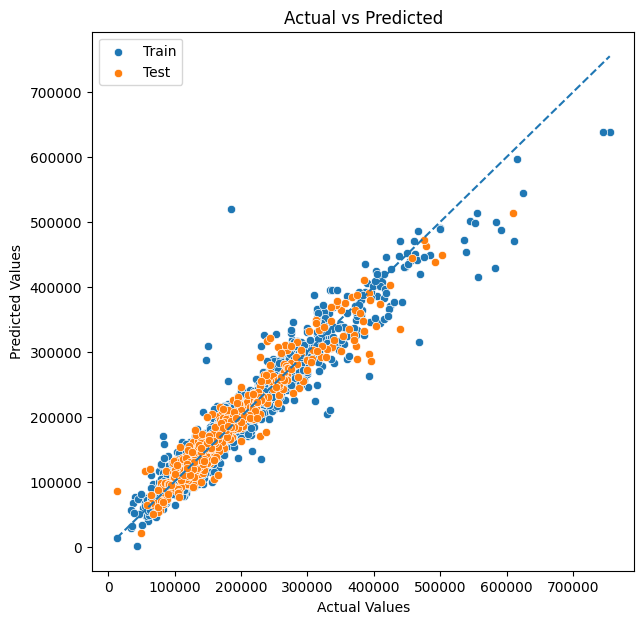

y_train range: 13100 755000
y_train_pred range: 476.9661660704296 638957.0977552736


In [104]:

model.fit(X_train_transformed, y_train)
y_train_pred = model.predict(X_train_transformed)
y_test_pred  = model.predict(X_test_transformed)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_train, y=y_train_pred, label="Train")
sns.scatterplot(x=y_test, y=y_test_pred, label="Test")

plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    linestyle="--"
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
print("y_train range:", y_train.min(), y_train.max())
print("y_train_pred range:", y_train_pred.min(), y_train_pred.max())


#### Optimizers:

* SDG uses different kind optimization technique to update the weight compared to LinearRegression imported from sklearn.

* The one we implemented from scratch was Batch gradient descent, which is a different kind of optimizer.

* Examples:

    * Batch Gradient Descent

    * Stochastic Gradient Descent (SGD)

    * Mini-batch GD

    * Momentum

    * "Adam, RMSProp (more common in deep learning)
